In [2]:
import pandas as pd
import datetime 

#Load the data
df = pd.read_csv('https://data.seattle.gov/resource/33kz-ixgy.csv', 
                 parse_dates=['original_time_queued', 'arrived_time'],
                 index_col='original_time_queued')

In [3]:
#View data -- only 1000/4million? troubleshoot chunksize
#df
df.head()
#type(df.original_time_queued[0])

,cad_event_number,event_clearance_description,call_type,priority,initial_call_type,final_call_type,arrived_time,precinct,sector,beat
original_time_queued,,,,,,,,,,
2009-06-02 03:35:46,2009000189335,Evidence Submitted (new incident number required),"TELEPHONE OTHER, NOT 911",1,DIST - IP/JO - DV DIST - NO ASLT,"--DV - ARGUMENTS, DISTURBANCE (NO ARREST)",Jun 2 2009 04:09:38:000AM,EAST,CHARLIE,C1
2009-06-02 03:43:08,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1
2009-06-02 03:47:24,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",Jun 2 2009 03:47:24:000AM,WEST,KING,K1
2009-06-02 03:48:39,2009000189341,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",1,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,Jun 2 2009 04:01:55:000AM,SOUTH,OCEAN,O3
2009-06-02 03:49:37,2009000189342,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",1,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,Jun 2 2009 04:22:28:000AM,WEST,DAVID,D1


In [4]:
#Read & rename Columns
df = df.rename(columns = {
    'original_time_queued': 'Queue Time', 
    'event_clearance_description': 'Clear Description', 
    'call_type': 'Alert Type',
    'priority': 'Priority',
    'initial_call_type': 'Initial Call Type',
    'final_call_type': 'Final Call Type',
    'precinct': 'Precinct',
    'sector': 'Sector',
    'beat': 'Beat'
})

#df = df.drop(['cad_event_number', 'arrived_time'], axis=1)
df

#Future Questions
#   -- Initial Call-type vs Final Call-type
#   -- Response time
#   -- Initial Call type and Priority
#print(df.columns)
#df.index

,cad_event_number,Clear Description,Alert Type,Priority,Initial Call Type,Final Call Type,arrived_time,Precinct,Sector,Beat
original_time_queued,,,,,,,,,,
2009-06-02 03:35:46,2009000189335,Evidence Submitted (new incident number required),"TELEPHONE OTHER, NOT 911",1,DIST - IP/JO - DV DIST - NO ASLT,"--DV - ARGUMENTS, DISTURBANCE (NO ARREST)",Jun 2 2009 04:09:38:000AM,EAST,CHARLIE,C1
2009-06-02 03:43:08,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1
2009-06-02 03:47:24,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",Jun 2 2009 03:47:24:000AM,WEST,KING,K1
2009-06-02 03:48:39,2009000189341,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",1,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,Jun 2 2009 04:01:55:000AM,SOUTH,OCEAN,O3
2009-06-02 03:49:37,2009000189342,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",1,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,Jun 2 2009 04:22:28:000AM,WEST,DAVID,D1
...,...,...,...,...,...,...,...,...,...,...
2009-06-03 00:18:27,2009000190555,ASSISTANCE RENDERED,ONVIEW,2,ASSIST OTHER AGENCY - ROUTINE SERVICE,--DV - SERVICE OF COURT ORDER,Jun 3 2009 12:18:27:000AM,NORTH,JOHN,J1
2009-06-03 00:19:25,2009000190556,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),Jun 3 2009 01:55:32:000AM,WEST,QUEEN,Q3
2009-06-03 00:20:42,2009000190557,ASSISTANCE RENDERED,911,3,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),"DISTURBANCE, MISCELLANEOUS/OTHER",Jun 3 2009 01:51:53:000AM,SOUTHWEST,WILLIAM,W1


In [39]:
## Read Columns

#print(df['precinct'].describe(), end="\n\n")
#print(df['sector'].describe(), end="\n\n")
#print(df['beat'].describe(), end="\n\n")

## Read Rows using iloc: "integer location"
#print(df.iloc[1:4])

## Access data row by row
#for index, row in df.iterrows():
    #print(index, row['arrived_time'])
    
## Access data using textual information
#df.loc[df['precinct'] == 'WEST']

In [37]:
#Describe 'Clear Description' column
event_clearance = df['Clear Description'].unique()
event_clearance.sort()
print(event_clearance, end='\n\n')
print(df['Clear Description'].describe())

['(NOT CURRENTLY USED) ALARM NO RESPONSE' 'ASSISTANCE RENDERED'
 'CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)'
 'Citations – Criminal Citation Issued (new incident number required)'
 'DUPLICATED OR CANCELLED BY RADIO' 'EXTRA UNIT'
 'Evidence Submitted (new incident number required)'
 'FALSE COMPLAINT/UNFOUNDED' 'FOLLOW-UP REPORT MADE'
 'INCIDENT LOCATED, PUBLIC ORDER RESTORED'
 'NO POLICE ACTION POSSIBLE OR NECESSARY' 'NON-CRIMINAL REFERRAL'
 'ORAL WARNING GIVEN' 'OTHER REPORT MADE' 'PHYSICAL ARREST MADE'
 'PROBLEM SOLVING PROJECT' 'RADIO BROADCAST AND CLEAR'
 'REPORT WRITTEN (NO ARREST)' 'RESPONDING UNIT(S) CANCELLED BY RADIO'
 'SERVICE OF DVPA ORDER' 'STREET CHECK WRITTEN'
 'TRANSPORTATION OR ESCORT PROVIDED'
 'UNABLE TO LOCATE INCIDENT OR COMPLAINANT']

count                    1000
unique                     23
top       ASSISTANCE RENDERED
freq                      432
Name: Clear Description, dtype: object


In [41]:
#Describe 'Alert Type' column
alert_type = df['Alert type'].unique()
alert_type.sort()
print(alert_type, end='\n\n')
print(df['Alert type'].describe())

['911' 'ALARM CALL (NOT POLICE ALARM)' 'ONVIEW' 'TELEPHONE OTHER, NOT 911']

count       1000
unique         4
top       ONVIEW
freq         460
Name: Alert type, dtype: object


In [42]:
#Describe 'Priority' column
priority = df['Priority'].unique()
priority.sort()
print(priority, end='\n\n')
print(df['Priority'].describe())

[1 2 3 4 5 6 7 9]

count    1000.000000
mean        3.915000
std         2.151372
min         1.000000
25%         2.000000
50%         3.000000
75%         7.000000
max         9.000000
Name: Priority, dtype: float64


In [5]:
#Describe 'Final Call Type' column
final_call = df['Final Call Type'].unique()
final_call.sort()
print(final_call, end='\n\n')
print(df['Final Call Type'].describe())

['--ALARM-RESIDENTIAL BURG' '--ANIMAL COMPLAINT - INJURED,DEAD,DANGEROUS'
 '--ARSON, BOMBS, EXPLO - ARSON' '--ASSAULTS - FIREARM INVOLVED'
 '--ASSAULTS - HARASSMENT, THREATS' '--ASSAULTS, OTHER'
 '--ASSIST OTHER AGENCY - CITY AGENCY'
 '--ASSIST OTHER AGENCY - COUNTY AGENCY'
 '--ASSIST OTHER AGENCY - FEDERAL AGENCY'
 '--ASSIST OTHER AGENCY - STATE AGENCY'
 '--ASSIST PUBLIC - 911 HANG UP, OPEN LINE'
 '--ASSIST PUBLIC - OTHER (NON-SPECIFIED)' '--AUTOMOBILES - AUTO THEFT'
 '--AUTOMOBILES - AUTO THEFT & RECOVERY'
 '--AUTOMOBILES - LICENSE PLATE(S) THEFT OR LOSS'
 '--AUTOMOBILES - RECOVERY (THEFT)'
 '--BURGLARY - NON RESIDENTIAL/COMMERCIAL'
 '--BURGLARY - RESIDENTIAL OCCUPIED'
 '--BURGLARY - RESIDENTIAL, UNOCCUPIED'
 '--BURGLARY - UNOCC STRUC ON RESN PROP'
 '--CASUALTY NON-TRAF NON-CRIM - DRUG RELATED (OD)'
 '--CASUALTY,NON-TRAF,NON-CRIM - NON-DRUG RELATED'
 '--CHILD - ABANDONED, ABUSED AND NEGLECTED'
 '--CHILD - CHILD ENDANGERMENT' '--CRISIS COMPLAINT - GENERAL'
 '--DISTURBANCE - FIGHT' '--

In [6]:
#Describe 'Precinct' column
precinct = df['Precinct'].unique()
precinct.sort()
print(precinct, end="\n\n")
print(df['Precinct'].describe())

['EAST' 'NORTH' 'SOUTH' 'SOUTHWEST' 'UNKNOWN' 'WEST']

count     1000
unique       6
top       WEST
freq       298
Name: Precinct, dtype: object


In [14]:
#Describe 'Sector' column
sector = df['Sector'].unique()
sector.sort()
print(sector, end="\n\n")
print(df['Sector'].describe())

TypeError: '<' not supported between instances of 'str' and 'float'

In [12]:
#Describe 'Beat' column
beat = df['Beat'].unique()
beat.sort()
print(beat, end="\n\n")
print(df['Beat'].describe())

['99' 'B1' 'B2' 'B3' 'C1' 'C2' 'C3' 'CTY' 'D1' 'D2' 'D3' 'DET' 'E1' 'E2'
 'E3' 'F1' 'F2' 'F3' 'G1' 'G2' 'G3' 'J1' 'J2' 'J3' 'K1' 'K2' 'K3' 'L1'
 'L2' 'L3' 'M1' 'M2' 'M3' 'N1' 'N2' 'N3' 'O1' 'O2' 'O3' 'Q1' 'Q2' 'Q3'
 'R1' 'R2' 'R3' 'S' 'S1' 'S2' 'S3' 'SS' 'SWT' 'TRF' 'U1' 'U2' 'U3' 'W'
 'W1' 'W2' 'W3']

count     1000
unique      59
top         M3
freq        43
Name: Beat, dtype: object


In [23]:
##Select Data for a particular timeframe
#df['2009-06-03 00:00:00': '2009-06-03 23:59:59']

#List of dates in df
dates = df.index.values
dates

array(['2009-06-02T03:35:46.000000000', '2009-06-02T03:43:08.000000000',
       '2009-06-02T03:47:24.000000000', '2009-06-02T03:48:39.000000000',
       '2009-06-02T03:49:37.000000000', '2009-06-02T03:53:00.000000000',
       '2009-06-02T03:54:42.000000000', '2009-06-02T03:55:27.000000000',
       '2009-06-02T03:58:02.000000000', '2009-06-02T03:58:23.000000000',
       '2009-06-02T03:59:17.000000000', '2009-06-02T04:00:22.000000000',
       '2009-06-02T04:06:23.000000000', '2009-06-02T04:07:43.000000000',
       '2009-06-02T04:10:17.000000000', '2009-06-02T04:10:35.000000000',
       '2009-06-02T04:10:37.000000000', '2009-06-02T04:12:54.000000000',
       '2009-06-02T04:13:02.000000000', '2009-06-02T04:16:41.000000000',
       '2009-06-02T04:23:15.000000000', '2009-06-02T04:28:22.000000000',
       '2009-06-02T04:30:13.000000000', '2009-06-02T04:32:03.000000000',
       '2009-06-02T04:34:30.000000000', '2009-06-02T04:35:37.000000000',
       '2009-06-02T04:41:28.000000000', '2009-06-02

In [22]:
## Method for quick metrics
#df.describe()

## Sort values
#df.sort_values(['beat', 'call_type'], ascending=False)

In [ ]:
## Making changes to data
## Remove a column
#df = df.drop(columns=['Total'])

## Move columns
## Doesn't modify data, visual change
#cols = list(df.colums)
#df = df[["Total", "HP", 'Defense']]

In [ ]:
## Update csv without index column
#df.to_csv('new_one.csv', index="False")

In [28]:
##Filtering the Data
import re

##Make a filtered df, beware keeps original index numbers
#new_df = df.loc[(df["beat"] == "C1") & \
#                (df["final_call_type"] == "--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON")]
#new_df = new_df.reset_index(drop=True) #drops old index
#new_df.to_csv('filtered.csv')
#print(new_df)

##Filter for a part of a name using contains method
## ~ is the NOT symbol, ergo will return types w/o "SUSPICIOUS"
#df.loc[~df['Final Call Type'].str.contains("SUSPICIOUS")]
df.loc[df['Final Call Type'].str.contains("SUSPICIOUS")]

##Filter using Regex, | = "or", flags=re.I ignores case
#df.loc[df['final_call_type'].str.contains("suspicious|theft", flags=re.I, regex=True)]

,cad_event_number,Clear Description,Alert Type,Priority,Initial Call Type,Final Call Type,arrived_time,Precinct,Sector,Beat
original_time_queued,,,,,,,,,,
2009-06-02 03:48:39,2009000189341,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",1,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,Jun 2 2009 04:01:55:000AM,SOUTH,OCEAN,O3
2009-06-02 03:49:37,2009000189342,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",1,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,Jun 2 2009 04:22:28:000AM,WEST,DAVID,D1
2009-06-02 04:30:13,2009000189365,ORAL WARNING GIVEN,ONVIEW,7,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,Jun 2 2009 04:30:13:000AM,SOUTH,ROBERT,R3
2009-06-02 04:47:18,2009000189373,ASSISTANCE RENDERED,ONVIEW,7,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",Jun 2 2009 04:47:18:000AM,EAST,CHARLIE,C2
2009-06-02 04:55:47,2009000189374,ASSISTANCE RENDERED,ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT","SUSPICIOUS PERSON, VEHICLE OR INCIDENT",Jun 2 2009 04:55:47:000AM,SOUTHWEST,FRANK,F1
...,...,...,...,...,...,...,...,...,...,...
2009-06-02 23:26:43,2009000190500,ORAL WARNING GIVEN,ONVIEW,7,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,Jun 2 2009 11:26:43:000PM,EAST,GEORGE,G3
2009-06-02 23:42:59,2009000190515,ASSISTANCE RENDERED,ONVIEW,7,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",Jun 2 2009 11:42:59:000PM,EAST,GEORGE,G2
2009-06-03 00:17:22,2009000190553,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT","SUSPICIOUS PERSON, VEHICLE OR INCIDENT",Jun 3 2009 12:33:27:000AM,EAST,GEORGE,G1


In [111]:
##Groupby
#df.groupby(['precinct']).count().sort_values('initial_call_type', ascending=False)



In [86]:
from matplotlib import pyplot as plt
%matplotlib inline

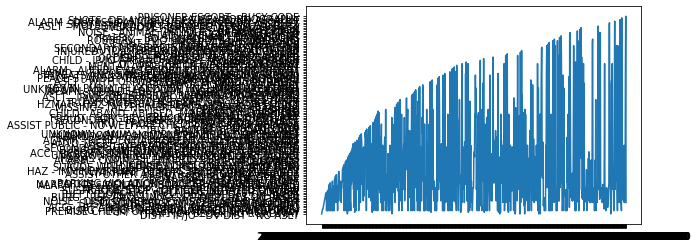

In [93]:
#plt.plot()
#"Call Types"
#plt.xlabel("orignal_time_queued")
#plt.ylabel("initial_call_type")
#plt.show()
plt.plot(df.original_time_queued, df.initial_call_type)
plt.show()

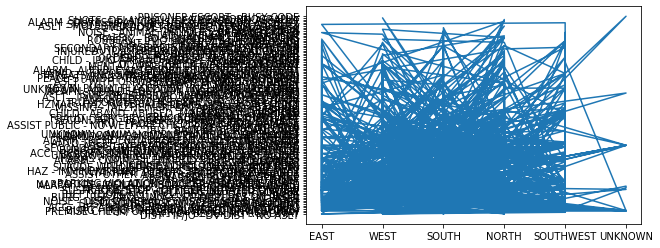

In [123]:
plt.plot(df.precinct, df.initial_call_type)
plt.show()

In [122]:
import datetime as dt

# Convert string object to Timestamp object
df['original_time_queued'] = df['original_time_queued'].apply(lambda x : pd.to_datetime(str(x)))
df['original_time_queued']

# Extract date from timestamp
#df['Date'] = [datetime.datetime.date(d) for d in df['DateTime']] 
#df['dates'] = df['original_time_queued'].dt.date
#df['dates']
df
# extracting time from timestamp
#df['Time'] = [datetime.datetime.time(d) for d in df['DateTime']]

,cad_event_number,event_clearance_description,call_type,priority,initial_call_type,final_call_type,original_time_queued,arrived_time,precinct,sector,beat,dates
0,2009000189335,Evidence Submitted (new incident number required),"TELEPHONE OTHER, NOT 911",1,DIST - IP/JO - DV DIST - NO ASLT,"--DV - ARGUMENTS, DISTURBANCE (NO ARREST)",2009-06-02 03:35:46,Jun 2 2009 04:09:38:000AM,EAST,CHARLIE,C1,2009-06-02
1,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,2009-06-02 03:43:08,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1,2009-06-02
2,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",2009-06-02 03:47:24,Jun 2 2009 03:47:24:000AM,WEST,KING,K1,2009-06-02
3,2009000189341,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",1,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,2009-06-02 03:48:39,Jun 2 2009 04:01:55:000AM,SOUTH,OCEAN,O3,2009-06-02
4,2009000189342,ASSISTANCE RENDERED,"TELEPHONE OTHER, NOT 911",1,BURG - IP/JO - RES (INCL UNOCC STRUCTURES),--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,2009-06-02 03:49:37,Jun 2 2009 04:22:28:000AM,WEST,DAVID,D1,2009-06-02
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2009000190555,ASSISTANCE RENDERED,ONVIEW,2,ASSIST OTHER AGENCY - ROUTINE SERVICE,--DV - SERVICE OF COURT ORDER,2009-06-03 00:18:27,Jun 3 2009 12:18:27:000AM,NORTH,JOHN,J1,2009-06-03
996,2009000190556,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),2009-06-03 00:19:25,Jun 3 2009 01:55:32:000AM,WEST,QUEEN,Q3,2009-06-03
997,2009000190557,ASSISTANCE RENDERED,911,3,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),"DISTURBANCE, MISCELLANEOUS/OTHER",2009-06-03 00:20:42,Jun 3 2009 01:51:53:000AM,SOUTHWEST,WILLIAM,W1,2009-06-03
998,2009000190558,TRANSPORTATION OR ESCORT PROVIDED,ONVIEW,9,-PRISONER ESCORT - BUSY CODE,-PRISONER ESCORT - BUSY CODE,2009-06-03 00:21:24,Jun 3 2009 12:21:24:000AM,UNKNOWN,NaN,W,2009-06-03


In [31]:
#plt.hist('dates', bins=365)
df.groupby(df['index'].dt.month).count()#.plot(kind="bar")

KeyError: 'index'

In [33]:
###NEEDS: 
#How to import data using chunksize and then merge data together for analysis. 
#How to display data in bar graphs by time 

#!git remote add origin https://github.com/lgaetano/FIFI.git

In [34]:
#!git push -u origin master

error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/lgaetano/FIFI.git'


In [ ]:
#https://github.com/lgaetano/FIFI.git